In [3]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

MODELS_DIR = "/part/01/Tmp/lvpoellhuber/models/custom_roberta"
DATASET_DIR = "/part/01/Tmp/lvpoellhuber/datasets"

# RoBERTa MNLI Performance
Before going further in the work with DPR, I wanted to do a quick checkpoint and make sure my models learn something. To do so, I use MNLI, which is a sequence classification task.

In [8]:
roberta_metrics_path = os.path.join(os.path.join(MODELS_DIR, "roberta_glue"), "metrics.csv") 
roberta_metrics = pd.read_csv(roberta_metrics_path, index_col = 0)

adaptive_metrics_path = os.path.join(os.path.join(MODELS_DIR, "adaptive_glue"), "metrics.csv") 
adaptive_metrics = pd.read_csv(adaptive_metrics_path, index_col = 0)

### Accuracies

In [31]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

/tmp/ipykernel_85225/962342300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=acc_df["model"], y=acc_df["accuracy"], palette = sns.color_palette())
/tmp/ipykernel_85225/962342300.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x=acc_df["model"], y=acc_df["accuracy"], palette = sns.color_palette())


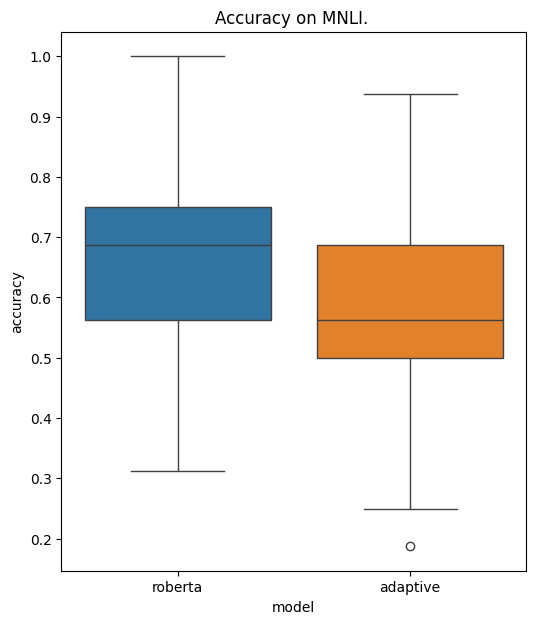

In [33]:
acc_roberta = pd.DataFrame(roberta_metrics["accuracy"])
acc_roberta["model"] = "roberta"

acc_adaptive = pd.DataFrame(adaptive_metrics["accuracy"])
acc_adaptive["model"] = "adaptive"

acc_df = pd.concat([acc_roberta, acc_adaptive], axis=0)

plt.figure(figsize=(6, 7))
sns.boxplot(x=acc_df["model"], y=acc_df["accuracy"], palette = sns.color_palette())
plt.title("Accuracy on MNLI. ")
plt.show()